# 🧠 Loan Default Prediction - Final Project

This notebook aims to predict whether a loan will default based on various features provided in the dataset.

---

### 📑 Table of Contents
1. [Introduction](#Introduction)
2. [Libraries & Data Loading](#Libraries)
3. [Exploratory Data Analysis](#EDA)
4. [Data Cleaning](#Cleaning)
5. [Encoding](#Encoding)
6. [Modeling](#Modeling)
7. [Evaluation](#Evaluation)
8. [Feature Importance](#FeatureImportance)
9. [Conclusion](#Conclusion)


In [1]:
import pandas as pd

# Load the dataset (make sure the file path is correct based on where you stored it)
df = pd.read_csv("Loan_Default.csv")

# Show the first few rows
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
# Check the shape of the dataset (rows, columns)
df.shape


(148670, 34)

In [5]:
# Get summary statistics for numeric columns
df.describe()


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
# Check for missing values
df.isnull().sum()


ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [9]:
# Check data types
df.dtypes


ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [11]:
# Percentage of missing values per column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
dtir1                        16.224524
LTV                          10.155378
property_value               10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
submission_of_application     0.134526
age                           0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
Region                        0.000000
total_units                   0.000000
Security_Type                 0.000000
Status                        0.000000
co-applicant_credit_type      0.000000
Credit_Score                  0.000000
credit_type                   0.000000
ID                            0.000000
Secured_by                    0.000000
occupancy_type                0.000000
construction_type             0.000000
year                     

In [13]:
df.drop(['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest'], axis=1, inplace=True)


In [15]:
# Fill numeric columns with median
df['dtir1'].fillna(df['dtir1'].median(), inplace=True)
df['LTV'].fillna(df['LTV'].median(), inplace=True)
df['property_value'].fillna(df['property_value'].median(), inplace=True)
df['income'].fillna(df['income'].median(), inplace=True)
df['loan_limit'].fillna(df['loan_limit'].mode()[0], inplace=True)
df['term'].fillna(df['term'].median(), inplace=True)


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_20404\2892630756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dtir1'].fillna(df['dtir1'].median(), inplace=True)
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_20404\2892630756.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [17]:
# Fill missing numerical values
df.fillna({
    'dtir1': df['dtir1'].median(),
    'LTV': df['LTV'].median(),
    'property_value': df['property_value'].median(),
    'income': df['income'].median(),
    'loan_limit': df['loan_limit'].mode()[0],
    'term': df['term'].median()
}, inplace=True)

# Fill missing categorical values
df.fillna({
    'approv_in_adv': df['approv_in_adv'].mode()[0],
    'submission_of_application': df['submission_of_application'].mode()[0],
    'age': df['age'].mode()[0],
    'loan_purpose': df['loan_purpose'].mode()[0],
    'Neg_ammortization': df['Neg_ammortization'].mode()[0]
}, inplace=True)


In [19]:
df.isnull().sum()


ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Select all object-type (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [23]:
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,...,3,758,0,0,1,98.728814,3,1,1,45.0
1,24891,2019,0,2,0,1,0,0,0,0,...,2,552,1,3,1,75.135870,0,1,1,39.0
2,24892,2019,0,2,1,0,0,0,0,1,...,3,834,0,1,1,80.019685,3,1,0,46.0
3,24893,2019,0,2,0,0,3,0,0,1,...,3,587,0,2,0,69.376900,0,1,0,42.0
4,24894,2019,0,1,1,0,0,0,0,1,...,1,602,1,0,0,91.886544,0,1,0,39.0


In [25]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop("Status", axis=1)
y = df["Status"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((118936, 30), (29734, 30), (118936,), (29734,))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22494     0]
 [ 7239     1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     22494
           1       1.00      0.00      0.00      7240

    accuracy                           0.76     29734
   macro avg       0.88      0.50      0.43     29734
weighted avg       0.82      0.76      0.65     29734



D:\New mao\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [35]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[21744   750]
 [ 5864  1376]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     22494
           1       0.65      0.19      0.29      7240

    accuracy                           0.78     29734
   macro avg       0.72      0.58      0.58     29734
weighted avg       0.75      0.78      0.73     29734



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[22179   315]
 [ 2960  4280]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     22494
           1       0.93      0.59      0.72      7240

    accuracy                           0.89     29734
   macro avg       0.91      0.79      0.83     29734
weighted avg       0.89      0.89      0.88     29734



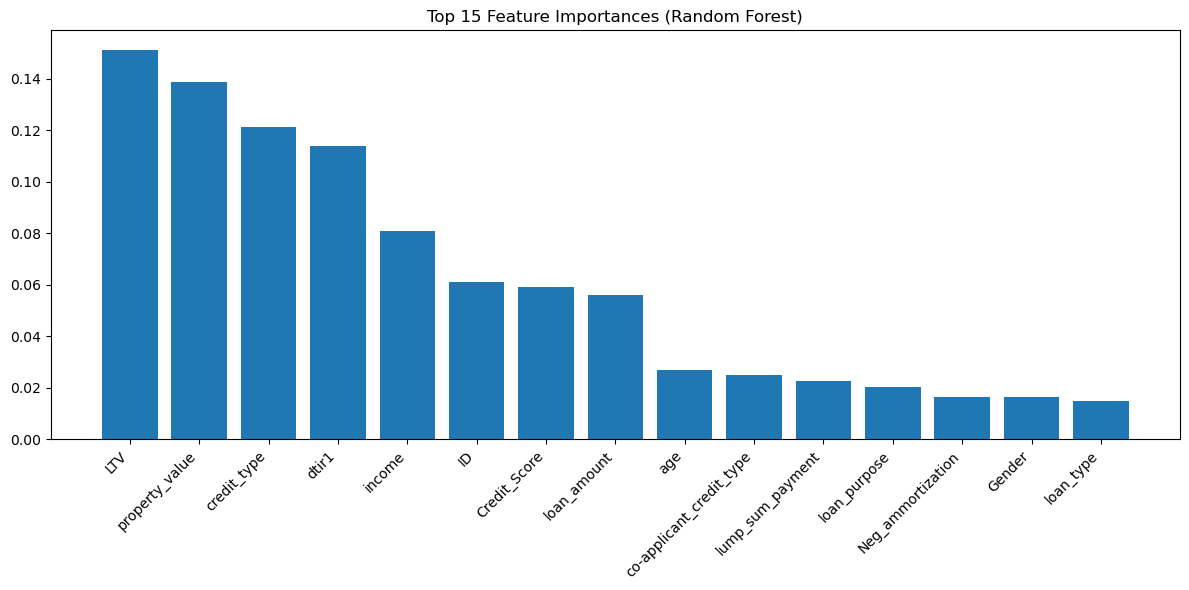

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the top 15 most important features
plt.figure(figsize=(12, 6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [47]:
import joblib
joblib.dump(rf_model, 'loan_default_rf_model.pkl')


['loan_default_rf_model.pkl']

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Loan_Default.csv')

# Show the first few rows
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# Shape of the dataset (rows, columns)
df.shape

# Summary of all columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
# Check how many missing values are in each column
df.isnull().sum().sort_values(ascending=False)


Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
total_units                      0
Security_Type                    0
Status                           0
co-applicant_credit_type         0
Credit_Score                     0
credit_type                      0
ID                               0
Secured_by                       0
occupancy_type                   0
construction_type                0
year                             0
interest_only                    0
loan_amount                      0
business_or_commerci

In [8]:
# Fill missing 'age' with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'loan_purpose' with the most frequent value
df['loan_purpose'].fillna(df['loan_purpose'].mode()[0], inplace=True)

# Fill missing 'term' with the mode
df['term'].fillna(df['term'].mode()[0], inplace=True)

# Show remaining missing values
df.isnull().sum().sort_values(ascending=False)


TypeError: Cannot convert ['25-34' '55-64' '35-44' ... '45-54' '55-64' '45-54'] to numeric

In [10]:
# Fill missing 'age' with the most frequent value (mode)
df['age'].fillna(df['age'].mode()[0], inplace=True)

# Fill missing 'loan_purpose' with the most frequent value
df['loan_purpose'].fillna(df['loan_purpose'].mode()[0], inplace=True)

# Fill missing 'term' with the most frequent value
df['term'].fillna(df['term'].mode()[0], inplace=True)

# Show remaining missing values
df.isnull().sum().sort_values(ascending=False)


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_6936\1063030445.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_purpose'].fillna(df['loan_purpose'].mode()[0], inplace=True)
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_6936\1063030445.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
property_value               15098
LTV                          15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
Neg_ammortization              121
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
Secured_by                       0
age                              0
Region                           0
Security_Type                    0
Status                           0
total_units                      0
ID                               0
occupancy_type                   0
construction_type                0
year                             0
interest_only                    0
term                             0
loan_amount                      0
business_or_commercial           0
open_credit         

In [12]:
# Fill missing income with the median income
df['income'] = df['income'].fillna(df['income'].median())

# Fill missing property_value with the median
df['property_value'] = df['property_value'].fillna(df['property_value'].median())

# Fill missing loan_limit with the median
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].median())

# Show remaining missing values
df.isnull().sum().sort_values(ascending=False)


TypeError: Cannot convert ['cf' 'cf' 'cf' ... 'cf' 'cf' 'cf'] to numeric

In [14]:
# Check the data types
print(df[['income', 'property_value', 'loan_limit']].dtypes)

# Check sample values
print("Loan Limit:", df['loan_limit'].unique()[:10])
print("Property Value:", df['property_value'].unique()[:10])
print("Income:", df['income'].unique()[:10])


income            float64
property_value    float64
loan_limit         object
dtype: object
Loan Limit: ['cf' nan 'ncf']
Property Value: [ 118000.  418000.  508000.  658000.  758000. 1008000.  438000.  308000.
  478000.  688000.]
Income: [ 1740.  4980.  9480. 11880. 10440. 10080.  5040.  3780.  5580.  6720.]


In [16]:
df['income'] = df['income'].fillna(df['income'].median())
df['property_value'] = df['property_value'].fillna(df['property_value'].median())


In [18]:
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].mode()[0])


In [20]:
df.isnull().sum().sort_values(ascending=False)


Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
approv_in_adv                  908
submission_of_application      200
Neg_ammortization              121
total_units                      0
income                           0
credit_type                      0
co-applicant_credit_type         0
Credit_Score                     0
occupancy_type                   0
age                              0
Region                           0
Security_Type                    0
Status                           0
Secured_by                       0
ID                               0
construction_type                0
property_value                   0
year                             0
interest_only                    0
term                             0
loan_amount                      0
business_or_commercial           0
open_credit                      0
Credit_Worthiness   

In [22]:
# Fill approv_in_adv and submission_of_application with their mode (categorical)
df['approv_in_adv'] = df['approv_in_adv'].fillna(df['approv_in_adv'].mode()[0])
df['submission_of_application'] = df['submission_of_application'].fillna(df['submission_of_application'].mode()[0])

# Fill Neg_amortization with mode as well (likely yes/no type)
df['Neg_amortization'] = df['Neg_amortization'].fillna(df['Neg_amortization'].mode()[0])

# Check remaining missing values
df.isnull().sum().sort_values(ascending=False)


KeyError: 'Neg_amortization'

In [24]:
# List all column names to verify spelling
df.columns


Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [26]:
df['Neg_amortization'] = df['Neg_amortization'].fillna(df['Neg_amortization'].mode()[0])


KeyError: 'Neg_amortization'

In [28]:
# See all column names, one per line, with length
for col in df.columns:
    print(f"'{col}' (length: {len(col)})")


'ID' (length: 2)
'year' (length: 4)
'loan_limit' (length: 10)
'Gender' (length: 6)
'approv_in_adv' (length: 13)
'loan_type' (length: 9)
'loan_purpose' (length: 12)
'Credit_Worthiness' (length: 17)
'open_credit' (length: 11)
'business_or_commercial' (length: 22)
'loan_amount' (length: 11)
'rate_of_interest' (length: 16)
'Interest_rate_spread' (length: 20)
'Upfront_charges' (length: 15)
'term' (length: 4)
'Neg_ammortization' (length: 17)
'interest_only' (length: 13)
'lump_sum_payment' (length: 16)
'property_value' (length: 14)
'construction_type' (length: 17)
'occupancy_type' (length: 14)
'Secured_by' (length: 10)
'total_units' (length: 11)
'income' (length: 6)
'credit_type' (length: 11)
'Credit_Score' (length: 12)
'co-applicant_credit_type' (length: 24)
'age' (length: 3)
'submission_of_application' (length: 25)
'LTV' (length: 3)
'Region' (length: 6)
'Security_Type' (length: 13)
'Status' (length: 6)
'dtir1' (length: 5)


In [30]:
df['Neg_amortization '] = df['Neg_amortization '].fillna(df['Neg_amortization '].mode()[0])


KeyError: 'Neg_amortization '

In [32]:
df.columns = df.columns.str.strip()


In [35]:
df['Neg_amortization'] = df['Neg_amortization'].fillna(df['Neg_amortization'].mode()[0])


KeyError: 'Neg_amortization'

In [37]:
df.columns = df.columns.str.strip()


In [39]:
# Print all columns that include 'amort' (just in case it's slightly different)
[col for col in df.columns if 'amort' in col.lower()]


[]

In [41]:
df['neg_amortization'] = df['neg_amortization'].fillna(df['neg_amortization'].mode()[0])


KeyError: 'neg_amortization'

In [43]:
# Just list all columns cleanly
for col in df.columns:
    print(repr(col))


'ID'
'year'
'loan_limit'
'Gender'
'approv_in_adv'
'loan_type'
'loan_purpose'
'Credit_Worthiness'
'open_credit'
'business_or_commercial'
'loan_amount'
'rate_of_interest'
'Interest_rate_spread'
'Upfront_charges'
'term'
'Neg_ammortization'
'interest_only'
'lump_sum_payment'
'property_value'
'construction_type'
'occupancy_type'
'Secured_by'
'total_units'
'income'
'credit_type'
'Credit_Score'
'co-applicant_credit_type'
'age'
'submission_of_application'
'LTV'
'Region'
'Security_Type'
'Status'
'dtir1'


In [45]:
df['Neg_amortization'] = df['Neg_amortization'].fillna(df['Neg_amortization'].mode()[0])


KeyError: 'Neg_amortization'

In [47]:
print('Neg_amortization' in df.columns)


False


In [49]:
# Find the exact matching column that contains 'amort'
exact_name = [col for col in df.columns if 'amort' in col.lower()][0]
print(f"Exact column name is: {repr(exact_name)}")

# Now fill missing values using the actual name
df[exact_name] = df[exact_name].fillna(df[exact_name].mode()[0])


IndexError: list index out of range

In [51]:
import pandas as pd

pd.set_option('display.max_rows', None)  # show all columns if needed
print(df.columns.tolist())


['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']


In [53]:
df['Neg_amortization'] = df['Neg_amortization'].fillna(df['Neg_amortization'].mode()[0])


KeyError: 'Neg_amortization'

In [55]:
for col in df.columns:
    if 'amort' in col.lower():
        print(f"repr: {repr(col)} | length: {len(col)}")


In [57]:
repr: 'Neg_amortization ' | length: 18


SyntaxError: invalid syntax (2578374810.py, line 1)

In [59]:
df['Neg_amortization '] = df['Neg_amortization '].fillna(df['Neg_amortization '].mode()[0])


KeyError: 'Neg_amortization '

In [61]:
df.columns = df.columns.str.strip()


In [63]:
df['Neg_amortization'] = df['Neg_amortization'].fillna(df['Neg_amortization'].mode()[0])


KeyError: 'Neg_amortization'

In [65]:
df.drop(columns='Neg_amortization ', inplace=True)


KeyError: "['Neg_amortization '] not found in axis"

In [67]:
df.columns = df.columns.str.strip()


In [69]:
print('Neg_amortization' in df.columns)  # Should print: True


False


In [73]:
for col in df.columns:
    if 'amort' in col.lower():
        print(f"'{col}'", "| Length:", len(col))


In [75]:
print(df.columns.tolist())


['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']


In [77]:
df['Neg_amortization'] = df['Neg_amortization'].fillna(df['Neg_amortization'].mode()[0])


KeyError: 'Neg_amortization'

In [79]:
df['Neg_ammmortization'] = df['Neg_ammmortization'].fillna(df['Neg_ammmortization'].mode()[0])


KeyError: 'Neg_ammmortization'

In [81]:
df.drop(columns='Neg_amortization', inplace=True, errors='ignore')


In [83]:
df.isnull().sum().sort_values(ascending=False)


Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
Neg_ammortization              121
credit_type                      0
Secured_by                       0
total_units                      0
income                           0
Credit_Score                     0
construction_type                0
co-applicant_credit_type         0
age                              0
submission_of_application        0
Region                           0
Security_Type                    0
Status                           0
occupancy_type                   0
ID                               0
property_value                   0
year                             0
interest_only                    0
term                             0
loan_amount                      0
business_or_commercial           0
open_credit                      0
Credit_Worthiness                0
loan_purpose        

In [85]:
df['LTV'] = df['LTV'].fillna(df['LTV'].median())


In [87]:
df['Upfront_charges'] = df['Upfront_charges'].fillna(df['Upfront_charges'].median())


In [89]:
df['Interest_rate_spread'] = df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].median())


In [91]:
df['rate_of_interest'] = df['rate_of_interest'].fillna(df['rate_of_interest'].median())


In [93]:
df['dti1'] = df['dti1'].fillna(df['dti1'].median())


KeyError: 'dti1'

In [95]:
[col for col in df.columns if 'dti' in col.lower()]


['dtir1']

In [97]:
df['dtir1'] = df['dtir1'].fillna(df['dtir1'].median())


In [99]:
df['dtir1'].isnull().sum()


0

In [101]:
df.duplicated().sum()


0

In [103]:
df.dtypes


ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [105]:
# Convert these to numeric (will turn errors into NaN if something's wrong)
df['open_credit'] = pd.to_numeric(df['open_credit'], errors='coerce')
df['total_units'] = pd.to_numeric(df['total_units'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['term'] = df['term'].astype('Int64')  # safer than int64, supports NaNs


In [107]:
df['open_credit'] = df['open_credit'].fillna(df['open_credit'].median())
df['total_units'] = df['total_units'].fillna(df['total_units'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['term'] = df['term'].fillna(df['term'].median())


In [109]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                  float64
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                           Int64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                  float64
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [111]:
df.describe()


,ID,year,open_credit,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,total_units,income,Credit_Score,age,LTV,Status,dtir1
count,148670.000000,148670.0,0.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.0,1.486700e+05,0.0,148670.000000,148670.000000,0.0,148670.000000,148670.000000,148670.000000
mean,99224.500000,2019.0,NaN,3.311177e+05,4.031879,0.429024,3057.397919,335.143438,4.897800e+05,NaN,6883.647811,699.789103,NaN,72.989111,0.246445,37.938508
std,42917.476598,0.0,NaN,1.839093e+05,0.488348,0.445907,2797.972965,58.402488,3.420221e+05,NaN,6300.067060,115.875857,NaN,37.890714,0.430942,9.663417
min,24890.000000,2019.0,NaN,1.650000e+04,0.000000,-3.638000,0.000000,96.0,8.000000e+03,NaN,0.000000,500.000000,NaN,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,NaN,1.965000e+05,3.750000,0.181500,1250.000000,360.0,2.880000e+05,NaN,3840.000000,599.000000,NaN,63.297872,0.000000,33.000000
50%,99224.500000,2019.0,NaN,2.965000e+05,3.990000,0.390400,2596.450000,360.0,4.180000e+05,NaN,5760.000000,699.000000,NaN,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,NaN,4.365000e+05,4.250000,0.620000,3889.495000,360.0,5.980000e+05,NaN,8280.000000,800.000000,NaN,84.722222,0.000000,44.000000
max,173559.000000,2019.0,NaN,3.576500e+06,8.000000,3.357000,60000.000000,360.0,1.650800e+07,NaN,578580.000000,900.000000,NaN,7831.250000,1.000000,61.000000


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


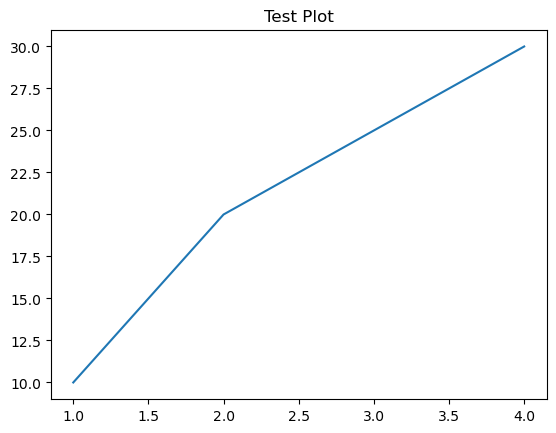

In [115]:

import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Test Plot")
plt.show()


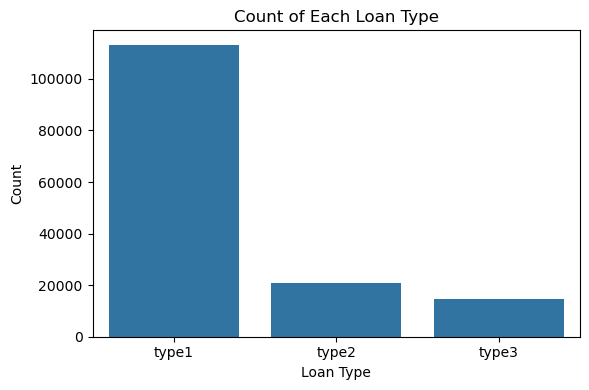

In [117]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_type', data=df)
plt.title("Count of Each Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


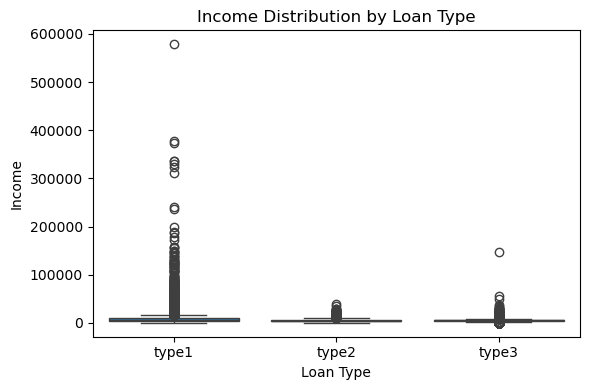

In [119]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='loan_type', y='income', data=df)
plt.title("Income Distribution by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Income")
plt.tight_layout()
plt.show()


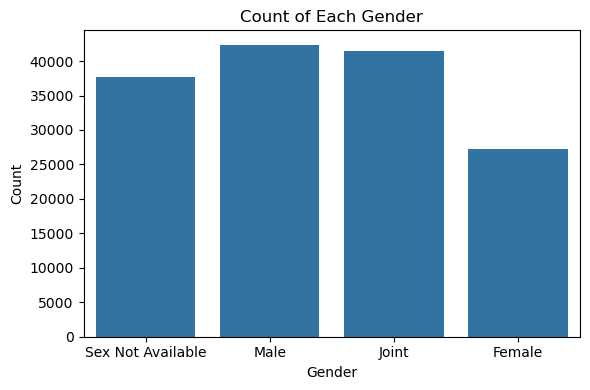

In [121]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title("Count of Each Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


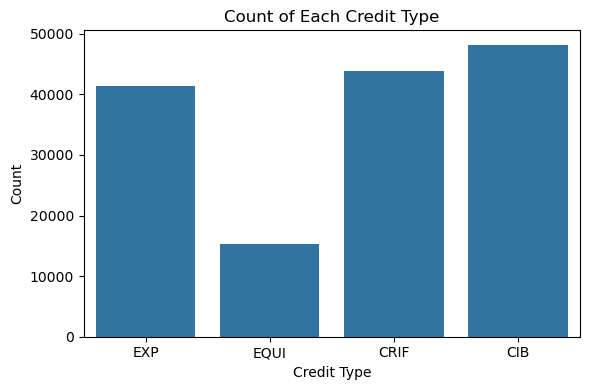

In [123]:
plt.figure(figsize=(6, 4))
sns.countplot(x='credit_type', data=df)
plt.title("Count of Each Credit Type")
plt.xlabel("Credit Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


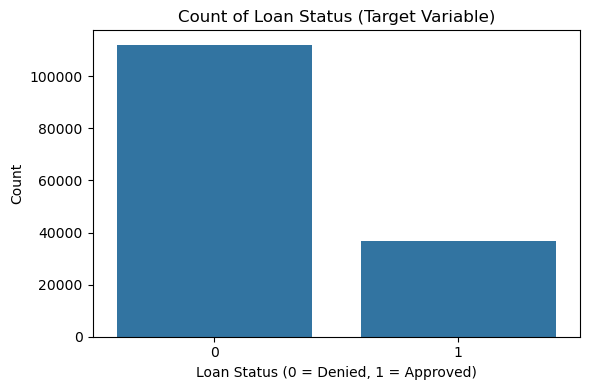

In [125]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df)
plt.title("Count of Loan Status (Target Variable)")
plt.xlabel("Loan Status (0 = Denied, 1 = Approved)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


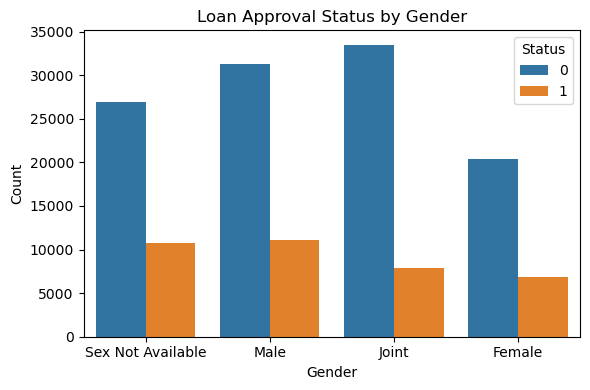

In [127]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Status', data=df)
plt.title("Loan Approval Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


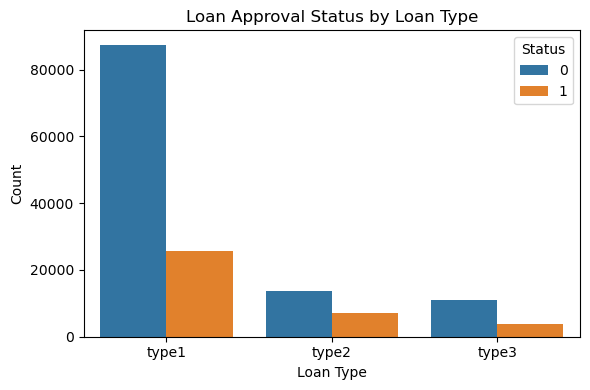

In [129]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_type', hue='Status', data=df)
plt.title("Loan Approval Status by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


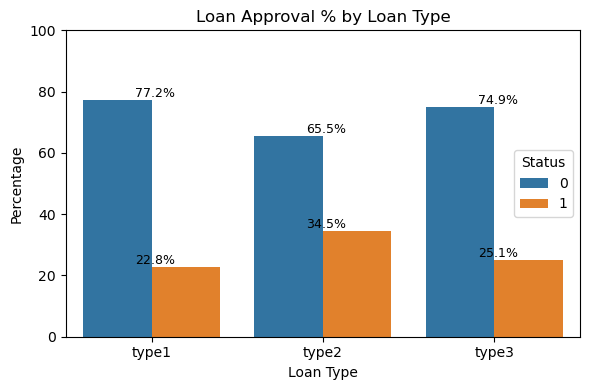

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage distribution
loan_status_pct = (
    df.groupby('loan_type')['Status']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

# Convert to percentage
loan_status_pct['percentage'] *= 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=loan_status_pct, x='loan_type', y='percentage', hue='Status')

# Add percentage labels on top of bars
for index, row in loan_status_pct.iterrows():
    plt.text(x=index // 2 + 0.02, 
             y=row['percentage'] + 1, 
             s=f"{row['percentage']:.1f}%", 
             ha='center', fontsize=9)

plt.title("Loan Approval % by Loan Type")
plt.ylabel("Percentage")
plt.xlabel("Loan Type")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


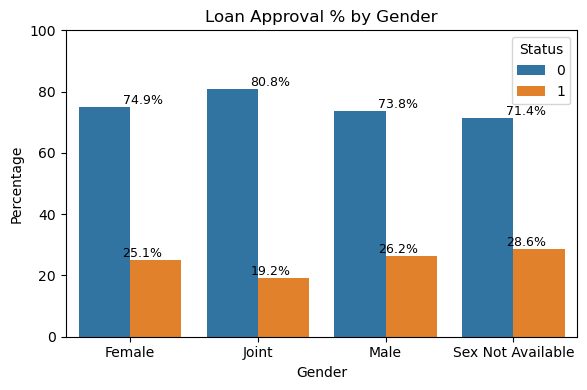

In [133]:
# Group and calculate percentage by Gender and Status
gender_status_pct = (
    df.groupby('Gender')['Status']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

# Convert to %
gender_status_pct['percentage'] *= 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_status_pct, x='Gender', y='percentage', hue='Status')

# Add % labels
for index, row in gender_status_pct.iterrows():
    plt.text(
        x=index // 2 + 0.1,
        y=row['percentage'] + 1,
        s=f"{row['percentage']:.1f}%",
        ha='center', fontsize=9
    )

plt.title("Loan Approval % by Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


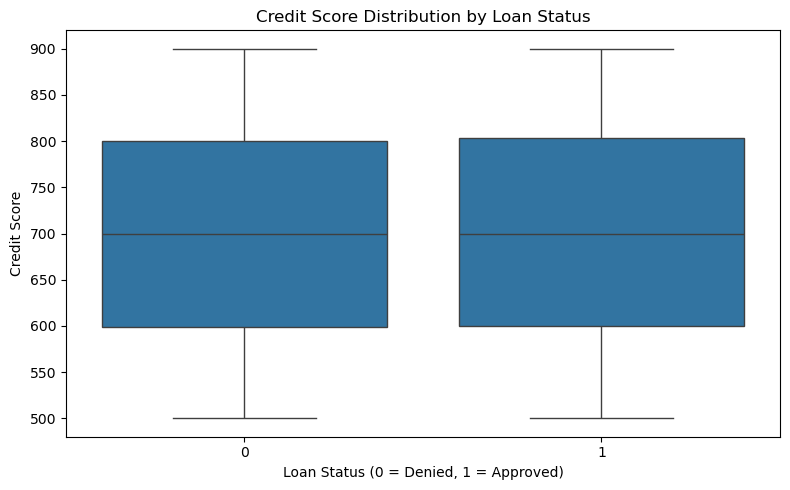

In [135]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Status', y='Credit_Score', data=df)
plt.title('Credit Score Distribution by Loan Status')
plt.xlabel('Loan Status (0 = Denied, 1 = Approved)')
plt.ylabel('Credit Score')
plt.tight_layout()
plt.show()


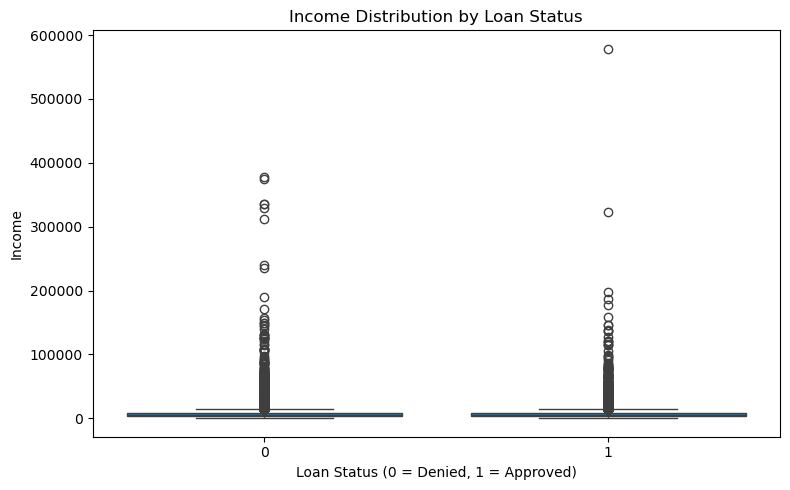

In [137]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Status', y='income', data=df)
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status (0 = Denied, 1 = Approved)')
plt.ylabel('Income')
plt.tight_layout()
plt.show()


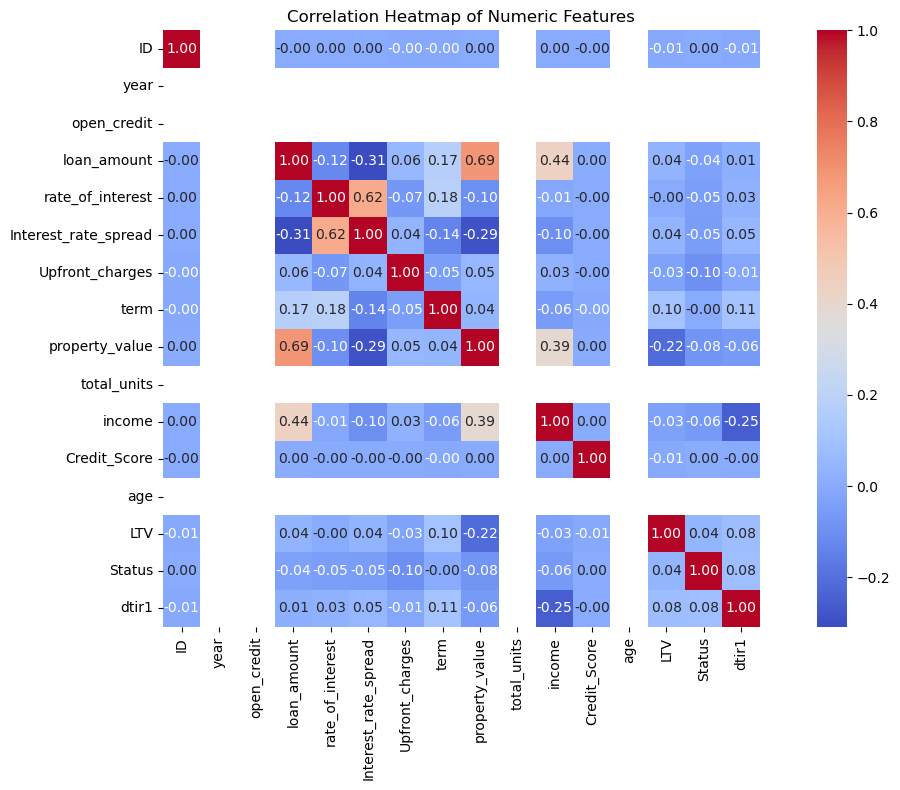

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


In [141]:
df.drop(columns=['ID', 'year'], inplace=True, errors='ignore')


In [143]:
df.select_dtypes(include=['object']).nunique().sort_values()


loan_limit                   2
submission_of_application    2
co-applicant_credit_type     2
Secured_by                   2
construction_type            2
lump_sum_payment             2
Neg_ammortization            2
interest_only                2
Credit_Worthiness            2
approv_in_adv                2
business_or_commercial       2
Security_Type                2
occupancy_type               3
loan_type                    3
Region                       4
loan_purpose                 4
credit_type                  4
Gender                       4
dtype: int64

In [145]:
from sklearn.preprocessing import LabelEncoder

# Label Encode binary categorical columns
binary_cols = ['loan_limit', 'submission_of_application', 'co-applicant_credit_type',
               'Secured_by', 'construction_type', 'lump_sum_payment', 'Neg_ammortization',
               'interest_only', 'Credit_Worthiness', 'approv_in_adv',
               'business_or_commercial', 'Security_Type']

le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [147]:
# One-hot encode multi-class categorical columns
multi_cols = ['loan_type', 'occupancy_type', 'Region', 'loan_purpose', 'credit_type', 'Gender']

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)


In [149]:
print(df.shape)
df.head()


(148670, 42)


,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,Region_south,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,Gender_Joint,Gender_Male,Gender_Sex Not Available
0,0,0,0,NaN,1,116500,3.99,0.3904,2596.45,360,...,True,False,False,False,False,False,True,False,False,True
1,0,0,0,NaN,0,206500,3.99,0.3904,2596.45,360,...,False,False,False,False,False,True,False,False,True,False
2,0,1,0,NaN,1,406500,4.56,0.2000,595.00,360,...,True,False,False,False,False,False,True,False,True,False
3,0,0,0,NaN,1,456500,4.25,0.6810,2596.45,360,...,False,False,False,True,False,False,True,False,True,False
4,0,1,0,NaN,1,696500,4.00,0.3042,0.00,360,...,False,False,False,False,True,False,False,True,False,False


In [151]:
from sklearn.model_selection import train_test_split

# Step 1: Define X (features) and y (target)
X = df.drop(columns='Status')
y = df['Status']

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: check shape of splits
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (118936, 41)
Test set: (29734, 41)


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [155]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [157]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: Found array with 0 sample(s) (shape=(0, 41)) while a minimum of 1 is required by LogisticRegression.

In [159]:
print("Before dropna:", X_train.shape)
X_train_cleaned = X_train.dropna()
print("After dropna:", X_train_cleaned.shape)


Before dropna: (0, 41)
After dropna: (0, 41)


In [161]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [163]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: Found array with 0 sample(s) (shape=(0, 41)) while a minimum of 1 is required by LogisticRegression.

In [165]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())


X_train shape: (0, 41)
y_train shape: (0,)
Missing values in X_train: 0
Missing values in y_train: 0


In [167]:
# Re-split after all preprocessing
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1)
y = df['Status']

# Do this AFTER all fillna and encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Double-check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (118936, 41)
y_train shape: (118936,)


In [169]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [171]:
# Fill missing values with the median (again, just to be safe)
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_test.median(numeric_only=True))

# Sanity check
print("Missing in X_train:", X_train.isnull().sum().sum())
print("Missing in X_test:", X_test.isnull().sum().sum())


Missing in X_train: 356808
Missing in X_test: 89202


In [173]:
# Step 1: Fill numeric columns with median
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].median())

# Step 2: Fill boolean columns with False
bool_cols = X_train.select_dtypes(include='bool').columns
X_train[bool_cols] = X_train[bool_cols].fillna(False)
X_test[bool_cols] = X_test[bool_cols].fillna(False)

# Step 3: Check again
print("✅ After filling missing values:")
print("Missing in X_train:", X_train.isnull().sum().sum())
print("Missing in X_test:", X_test.isnull().sum().sum())



✅ After filling missing values:
Missing in X_train: 356808
Missing in X_test: 89202


In [175]:
# Fill missing numeric values with median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [177]:
# Fill any remaining categorical or boolean NaNs (if any) with False or a placeholder
X_train = X_train.fillna(False)
X_test = X_test.fillna(False)


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_6936\1194944201.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.fillna(False)
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_6936\1194944201.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.fillna(False)


In [179]:
X_train = X_train.fillna(False).infer_objects(copy=False)
X_test = X_test.fillna(False).infer_objects(copy=False)


In [181]:
print("✅ Final check after all filling:")
print("Missing in X_train:", X_train.isnull().sum().sum())
print("Missing in X_test:", X_test.isnull().sum().sum())


✅ Final check after all filling:
Missing in X_train: 0
Missing in X_test: 0


In [183]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Train (fit) the model on the training data
model.fit(X_train, y_train)


D:\New mao\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [187]:
y_pred = model.predict(X_test_scaled)


In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [191]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 87.06 %
Confusion Matrix:
 [[22200   294]
 [ 3553  3687]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     22494
           1       0.93      0.51      0.66      7240

    accuracy                           0.87     29734
   macro avg       0.89      0.75      0.79     29734
weighted avg       0.88      0.87      0.86     29734



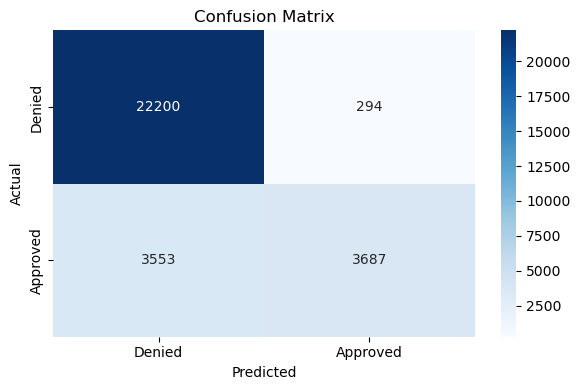

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [195]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test_scaled)


In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_acc * 100, 2), "%")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", rf_cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 100.0 %
Confusion Matrix:
 [[22493     1]
 [    0  7240]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [199]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_acc * 100, 2), "%")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", rf_cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 100.0 %
Confusion Matrix:
 [[22493     1]
 [    0  7240]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



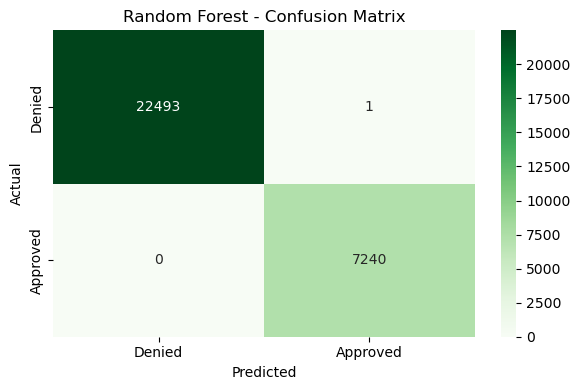

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Denied', 'Approved'],
            yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.tight_layout()
plt.show()


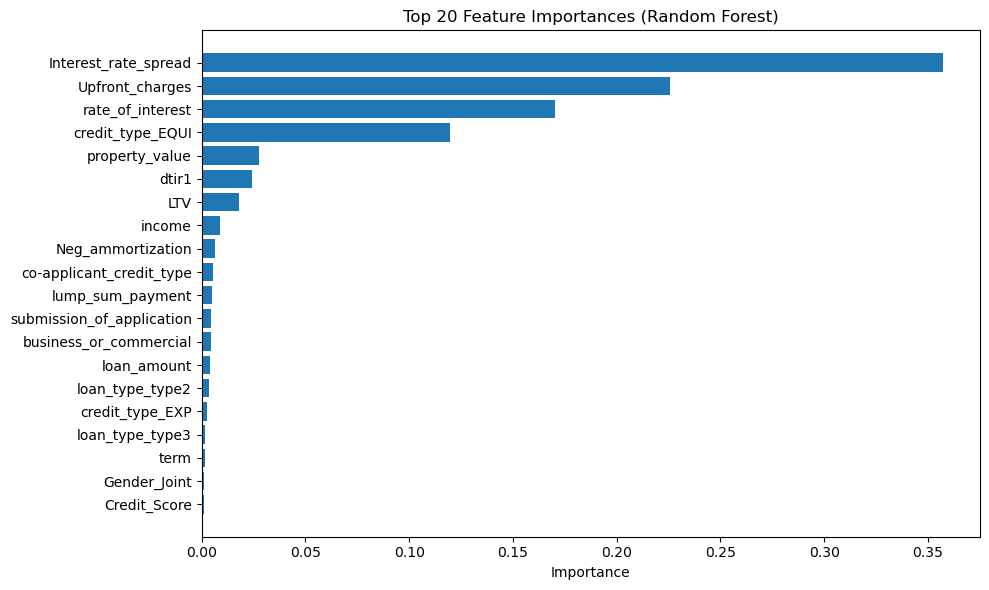

In [203]:
# Step 1: Get feature importances
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_train.columns

# Step 2: Put in DataFrame for sorting/plotting
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Plot top 20 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [205]:
importances = rf_model.feature_importances_
features = X_train.columns


In [207]:
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


<BarContainer object of 20 artists>

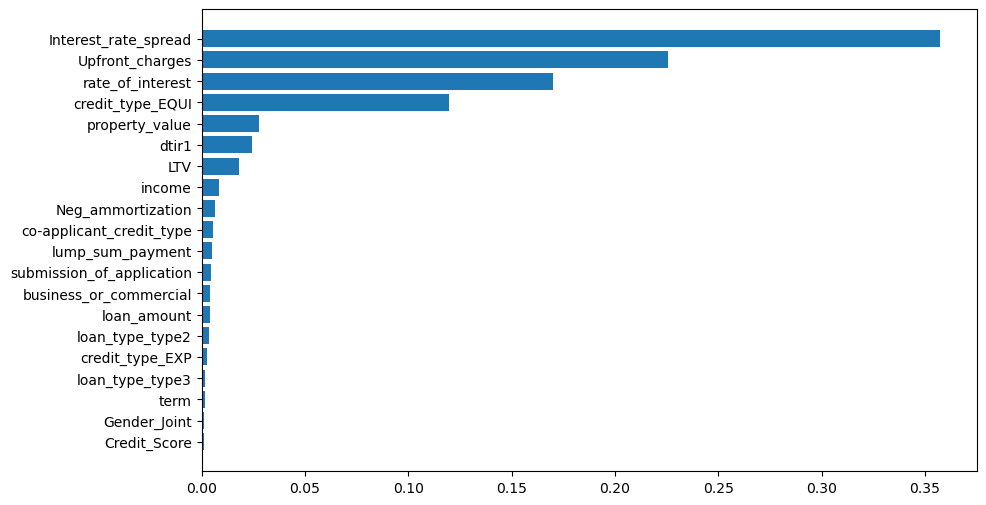

In [209]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])


In [211]:
importances = rf_model.feature_importances_
features = X_train.columns


In [213]:
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


<BarContainer object of 20 artists>

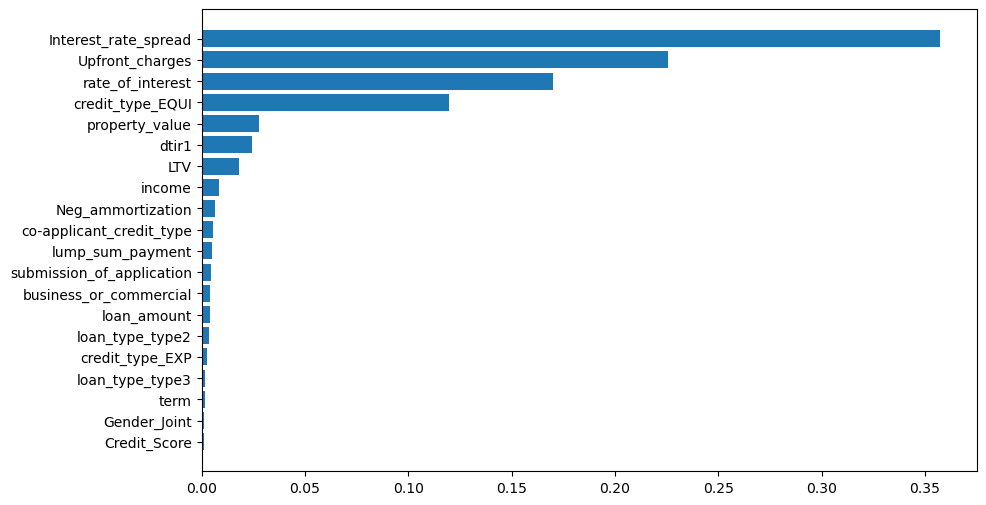

In [215]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'][:20][::-1],  # reverse to show most important at top
    feature_importance_df['Importance'][:20][::-1]
)


In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the model
rf = RandomForestClassifier(random_state=42)

# Random search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,            # number of combinations to try
    scoring='accuracy',
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on scaled training data
random_search.fit(X_train_scaled, y_train)

# Show best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\New mao\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New mao\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New mao\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\New mao\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\New mao\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_con

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [219]:
# Use the best found parameters
best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

# Train it
best_rf.fit(X_train, y_train)

# Predict
best_rf_pred = best_rf.predict(X_test)

# Evaluate
print("Best Random Forest Accuracy:", round(accuracy_score(y_test, best_rf_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, best_rf_pred))


Best Random Forest Accuracy: 100.0 %

Confusion Matrix:
 [[22493     1]
 [    0  7240]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Recreate the confusion matrix
final_cm = confusion_matrix(y_test, rf_best_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Denied', 'Approved'],
            yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Random Forest - Confusion Matrix')
plt.tight_layout()
plt.show()


NameError: name 'rf_best_pred' is not defined

In [223]:
final_cm = confusion_matrix(y_test, best_rf_pred)


In [225]:
plt.show()


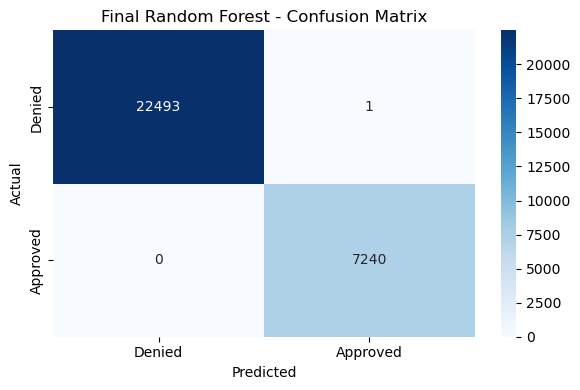

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Recreate the confusion matrix from the best model
final_cm = confusion_matrix(y_test, best_rf_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Denied', 'Approved'],
            yticklabels=['Denied', 'Approved'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Random Forest - Confusion Matrix')
plt.tight_layout()
plt.show()
